In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import h5py

plt.style.use(['science','notebook','grid'])
plt.rcParams['text.usetex'] = False

In [3]:
f = h5py.File('./kappa-m20201.hdf5')

for a in list(list(f)):
    print( a ,'.'*(25-len(a)), f[a].shape)

ave_pp ................... (111, 6)
boundary_mfp ............. ()
frequency ................ (111, 6)
gamma .................... (101, 111, 6)
gamma_isotope ............ (111, 6)
grid_point ............... (111,)
group_velocity ........... (111, 6, 3)
gv_by_gv ................. (111, 6, 6)
heat_capacity ............ (101, 111, 6)
kappa .................... (101, 6)
kappa_unit_conversion .... ()
mesh ..................... (3,)
mode_kappa ............... (101, 111, 6, 6)
qpoint ................... (111, 3)
temperature .............. (101,)
version .................. ()
weight ................... (111,)


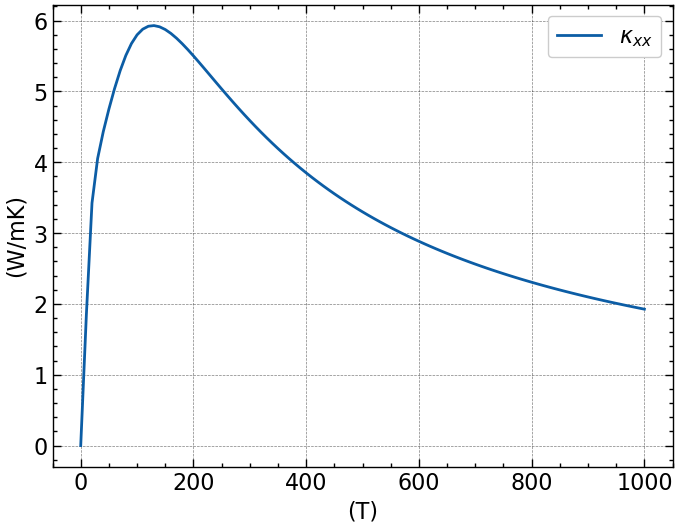

In [4]:


plt.plot(f['temperature'][:], np.array(f['kappa'])[:, 0], label=r'$\kappa_{xx}$')
# plt.plot(f['temperature'][:], f['kappa'][:, 1], label=r'$\kappa_{yy}$')

plt.xlabel('(T)')
plt.ylabel('(W/mK)')
plt.legend()
plt.grid(True)
plt.show()

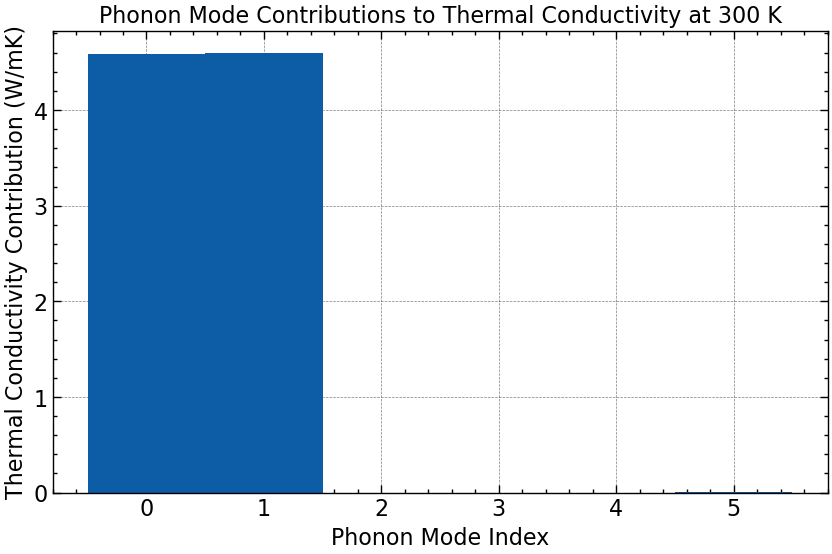

In [5]:


temperatures = f['temperature'][:]
kappa_mode = f['kappa'][:]  # Mode-resolved thermal conductivity
frequencies = f['frequency'][:]

# Sum up the contributions of each mode across all branches
kappa_total = np.sum(kappa_mode, axis=1)  # Summing over all modes

# For simplicity, let's analyze the contributions at a specific temperature
temp_index = np.argmin(np.abs(temperatures - 300))  # Find the index for 300 K

# Plot the mode-resolved contributions at 300 K
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(kappa_mode[temp_index])), kappa_mode[temp_index], width=1.0)
plt.xlabel('Phonon Mode Index')
plt.ylabel('Thermal Conductivity Contribution (W/mK)')
plt.title('Phonon Mode Contributions to Thermal Conductivity at 300 K')
plt.show()

In [6]:

g = f['gamma'][10]
gv = f['group_velocity']
g = np.where(g > 0, g, -1)
lifetime = np.where(g > 0, 1.0 / (2 * 2 * np.pi * g), 0)

[]

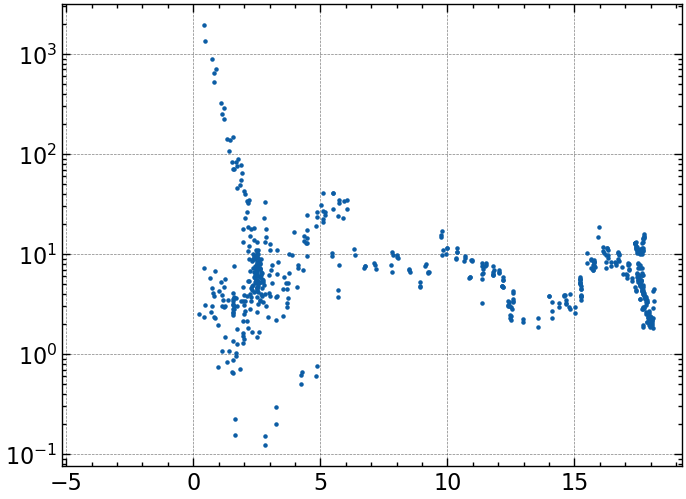

In [7]:
i = 1
plt.scatter(frequencies, lifetime, s=5)
plt.semilogy()


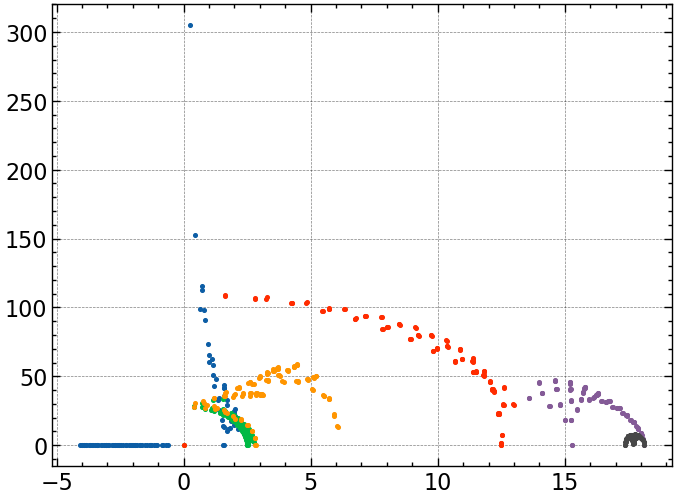

In [9]:
for i in range(6):  
    # i=4
    gv = np.sqrt(f['group_velocity'][:,i,0]**2 + f['group_velocity'][:,i,1]**2)
    plt.scatter(f['frequency'][:,i],gv, s=7)
# plt.ylim(0,100)